# 数据探索之统计分布

In [1]:
# 导入相关模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
np.random.random(size=5)  # size表示生成随机数的个数

array([ 0.53509513,  0.95382274,  0.83767692,  0.39072309,  0.43106996])

In [3]:
np.random.randint(1, 10, size=5)  # 生成5个1到9之间的随机整数

array([9, 3, 7, 2, 9])

In [4]:
np.random.seed(123)

###  二项分布

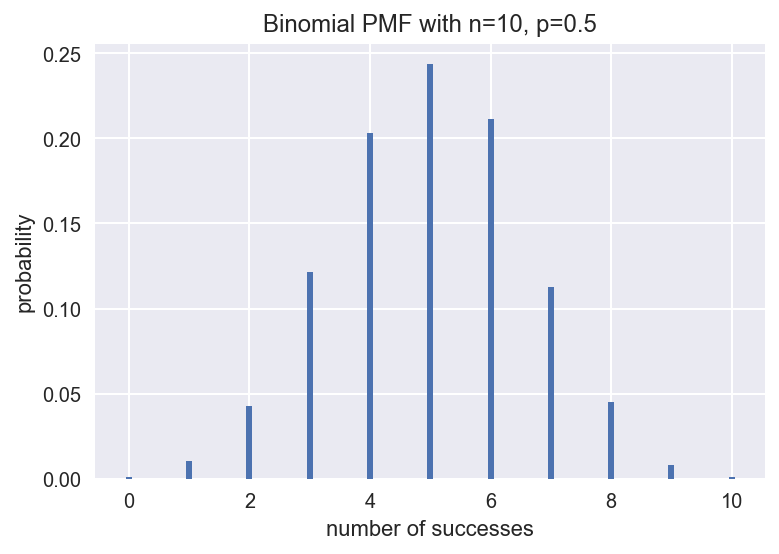

In [5]:
def plot_binomial(n,p):
    '''绘制二项分布的概率质量函数'''
    sample = np.random.binomial(n,p,size=10000)  # 产生10000个符合二项分布的随机数
    bins = np.arange(n+2) 
    plt.hist(sample, bins=bins, align='left', normed=True, rwidth=0.1)  # 绘制直方图
    #设置标题和坐标
    plt.title('Binomial PMF with n={}, p={}'.format(n,p))  
    plt.xlabel('number of successes')
    plt.ylabel('probability')
    

plot_binomial(10, 0.5)

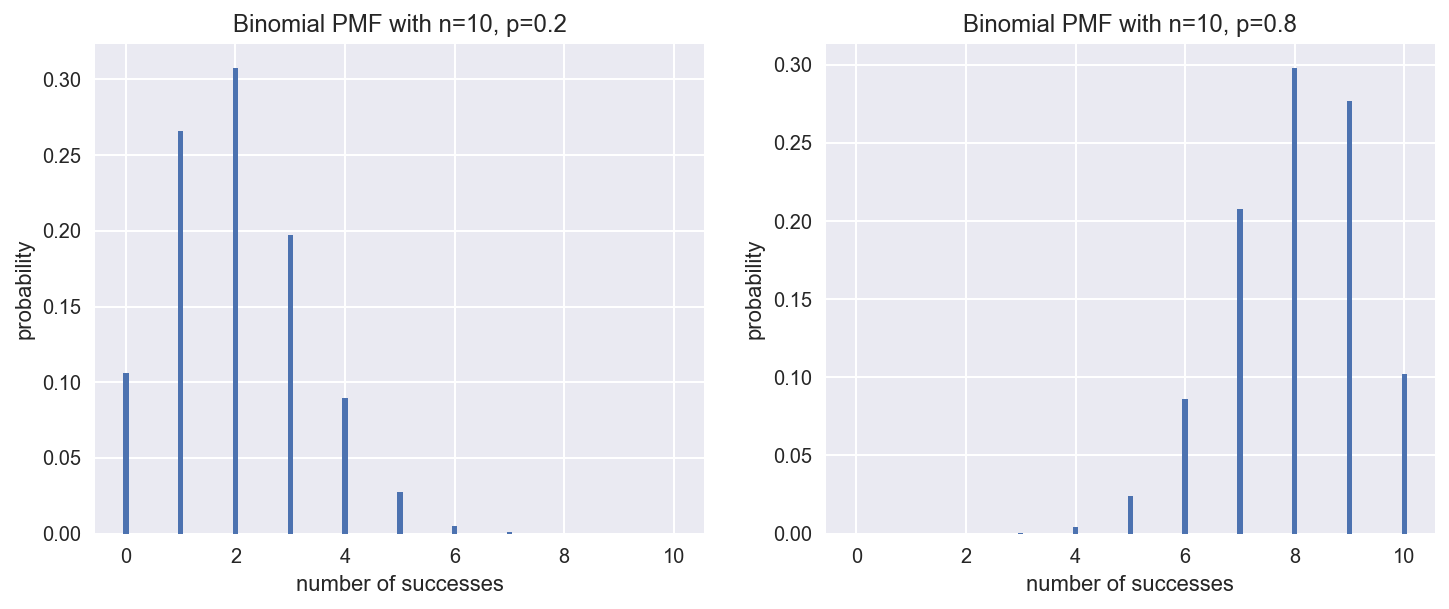

In [6]:
fig = plt.figure(figsize=(12,4.5)) #设置画布大小
p1 = fig.add_subplot(121)  # 添加第一个子图
plot_binomial(10, 0.2)
p2 = fig.add_subplot(122)  # 添加第二个子图
plot_binomial(10, 0.8)

### 泊松分布

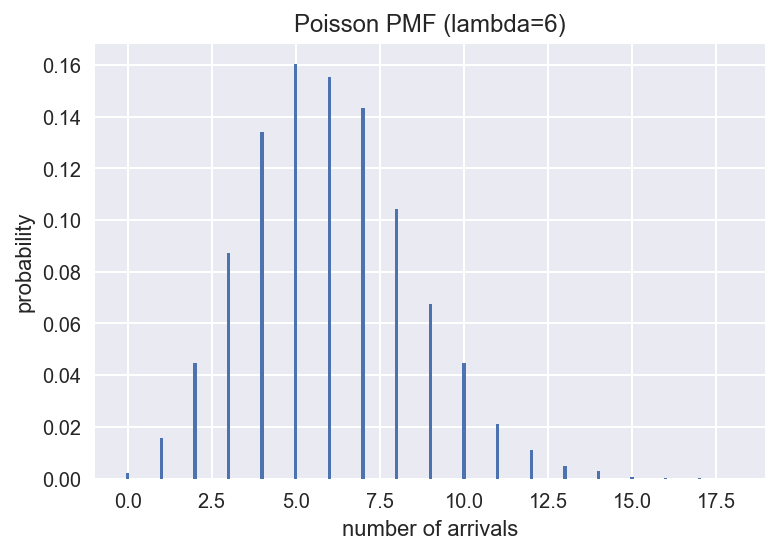

In [7]:
lamb = 6
sample = np.random.poisson(lamb, size=10000)  # 生成10000个符合泊松分布的随机数
bins = np.arange(20)
plt.hist(sample, bins=bins, align='left', rwidth=0.1, normed=True) # 绘制直方图
# 设置标题和坐标轴
plt.title('Poisson PMF (lambda=6)')
plt.xlabel('number of arrivals')
plt.ylabel('probability')
plt.show()

### 指数分布

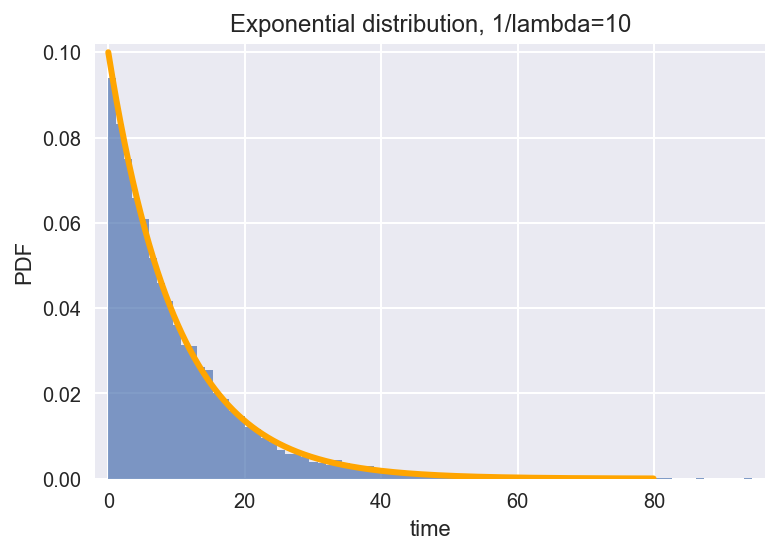

In [8]:
tau = 10
sample = np.random.exponential(tau, size=10000)  # 产生10000个满足指数分布的随机数
plt.hist(sample, bins=80, alpha=0.7, normed=True) #绘制直方图
plt.margins(0.02) 

# 根据公式绘制指数分布的概率密度函数
lam = 1 / tau
x = np.arange(0,80,0.1)
y = lam * np.exp(- lam * x)
plt.plot(x,y,color='orange', lw=3)

#设置标题和坐标轴
plt.title('Exponential distribution, 1/lambda=10')
plt.xlabel('time')
plt.ylabel('PDF')
plt.show()

### 正态分布

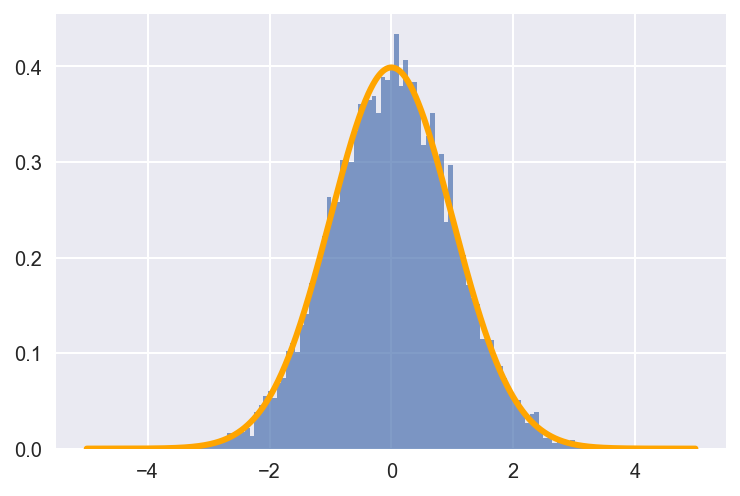

In [9]:
def norm_pdf(x,mu,sigma):
    '''正态分布概率密度函数'''
    pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

mu = 0    # 均值为0
sigma = 1 # 标准差为1

# 用统计模拟绘制正态分布的直方图
sample = np.random.normal(mu, sigma, size=10000)
plt. hist(sample, bins=100, alpha=0.7, normed=True)

# 根据正态分布的公式绘制PDF曲线
x = np.arange(-5, 5, 0.01)
y = norm_pdf(x, mu, sigma)
plt.plot(x,y, color='orange', lw=3)
plt.show()

### 身高、体重的分布

In [10]:
# 导入BRFSS数据
import brfss
df = brfss.ReadBrfss()
height = df.height.dropna()
weight = df.weight.dropna()

In [11]:
def plot_pdf_cdf(data, xbins, xrange, xlabel):
    '''绘制概率密度函数PDF和累积分布函数CDF'''
    
    fig = plt.figure(figsize=(16,5)) # 设置画布尺寸

    p1 = fig.add_subplot(121)  # 添加第一个子图
    # 绘制正态分布PDF曲线
    std = data.std()
    mean = data.mean()
    x = np.arange(xrange[0], xrange[1], (xrange[1]-xrange[0])/100)
    y = norm_pdf(x, mean, std)
    plt.plot(x,y, label='normal distribution')
    # 绘制数据的直方图
    plt.hist(data, bins=xbins, range=xrange, rwidth=0.9, 
             alpha=0.5, normed=True, label='observables')
    # 图片设置
    plt.legend()
    plt.xlabel(xlabel)
    plt.title(xlabel +' PDF')

    p2 = fig.add_subplot(122)  #添加第二个子图
    # 绘制正态分布CDF曲线
    sample = np.random.normal(mean, std, size=10000)
    plt.hist(sample, cumulative=True, bins=1000, range=xrange, 
             normed=True, histtype='step', lw=2, label='normal distribution')
    # 绘制数据的CDF曲线
    plt.hist(data, cumulative=True, bins=1000, range=xrange, 
             normed=True, histtype='step', lw=2, label='observables')
    #图片设置
    plt.legend(loc='upper left')
    plt.xlabel(xlabel)
    plt.title( xlabel + ' CDF')
    plt.show()

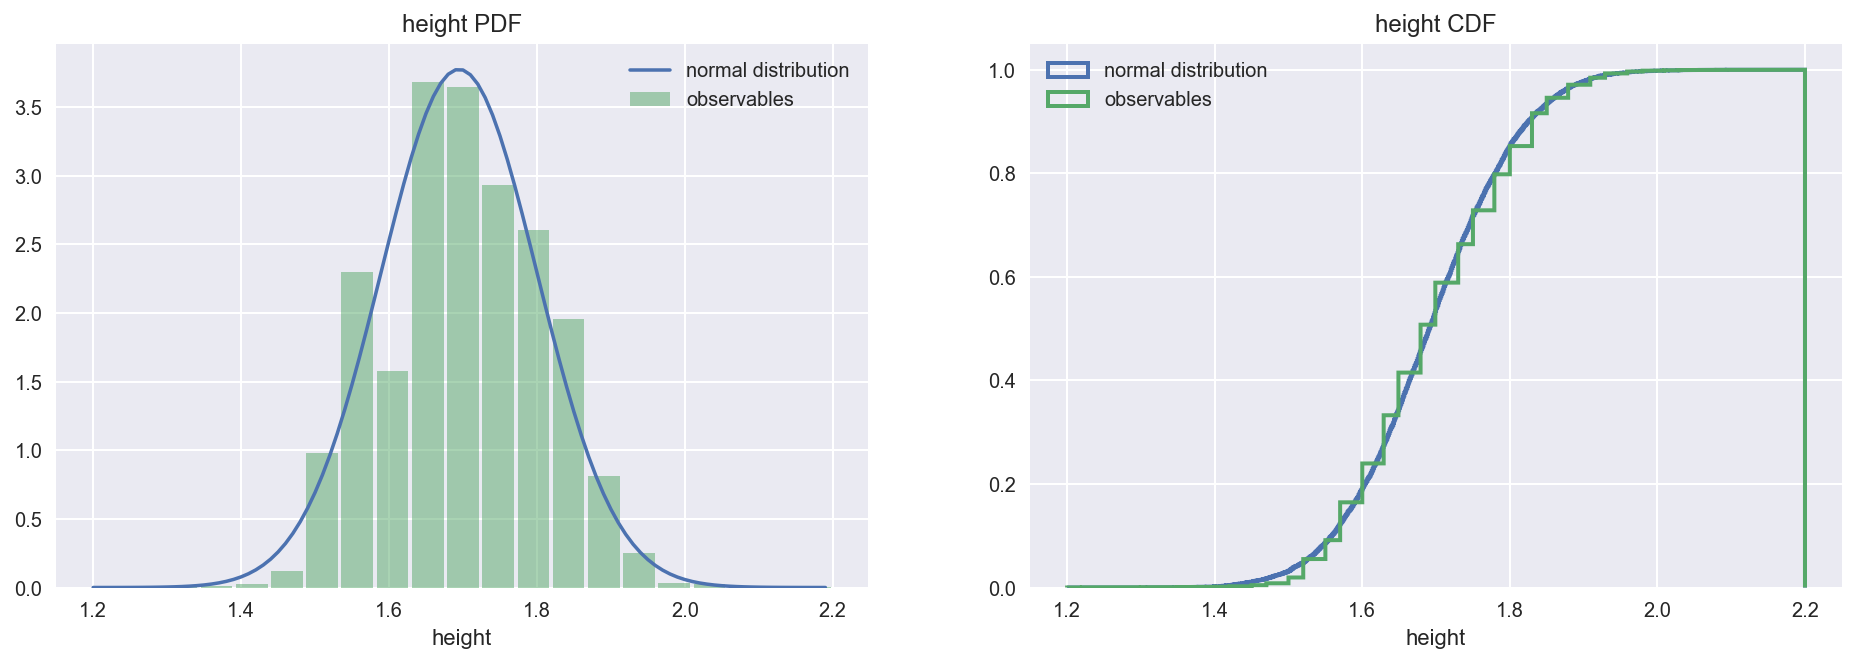

In [12]:
plot_pdf_cdf(data=height, xbins=21, xrange=(1.2, 2.2), xlabel='height')

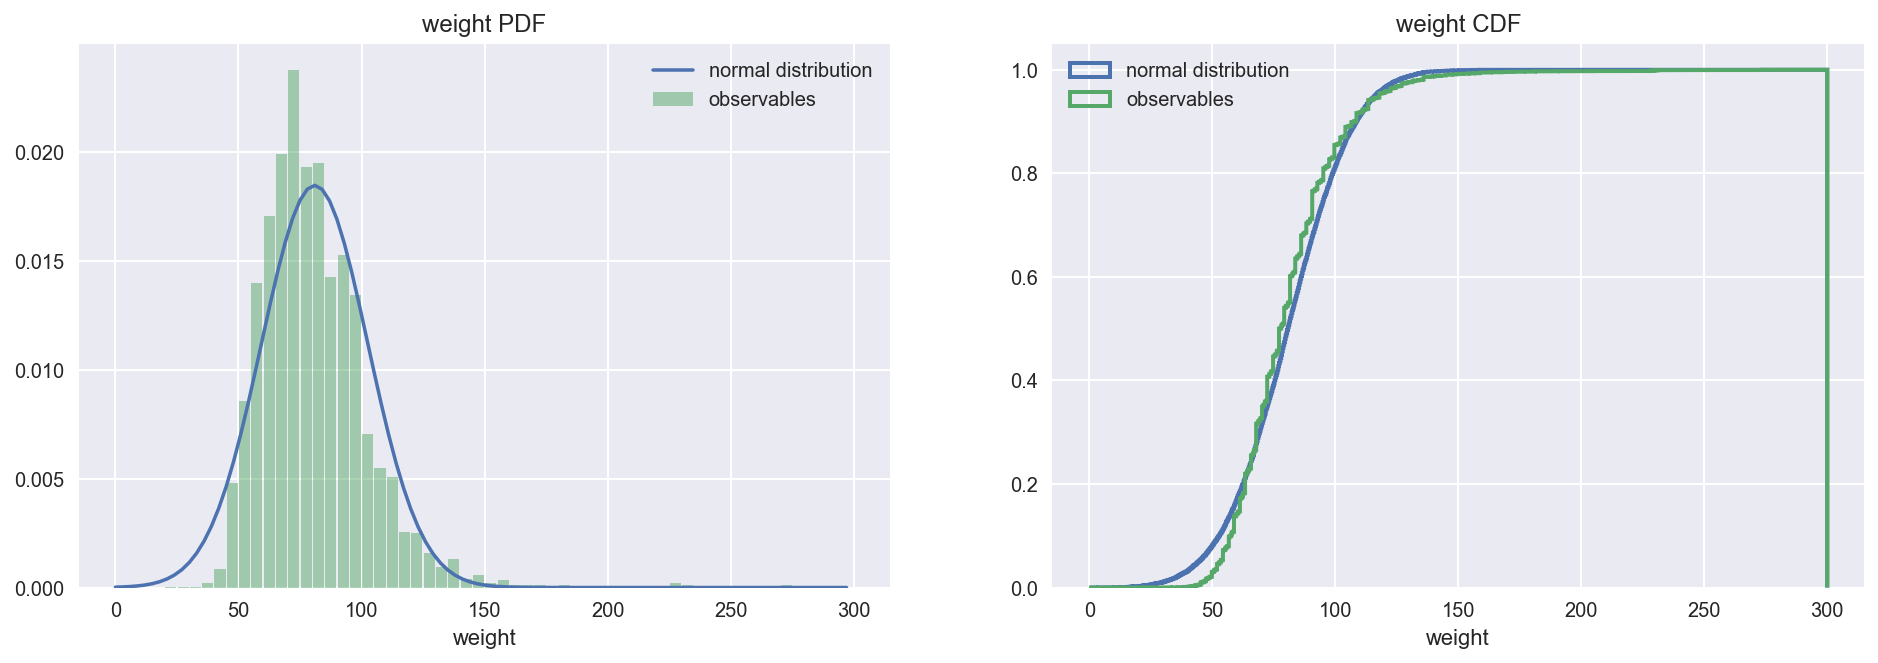

In [13]:
plot_pdf_cdf(data=weight, xbins=60, xrange=(0,300), xlabel='weight')

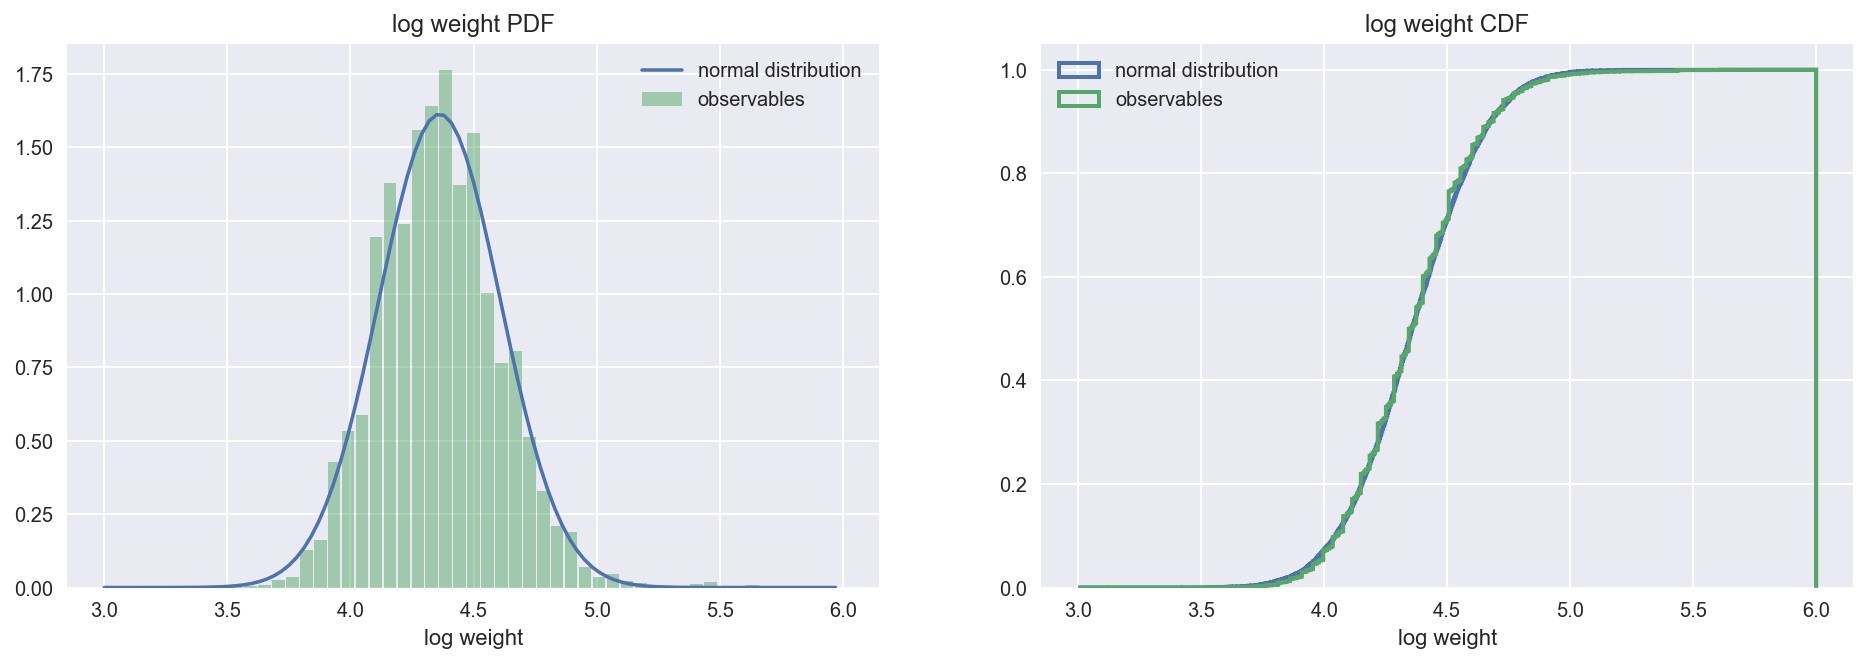

In [14]:
log_weight = np.log(weight)
plot_pdf_cdf(data=log_weight, xbins=53, xrange=(3,6), xlabel='log weight')